# What is the True Normal Human Body Temperature? 



The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In this exercise, we will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

In [24]:
# Import required packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import matplotlib.mlab as mlab
%matplotlib inline

In [25]:
# Read and save dataset as a dataframe:
df = pd.read_csv('data/human_body_temperature.csv')

## Task 0-Initial Exploriation of Data

In [26]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [27]:
# Inspect the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [28]:
# Count null values for each column in the dataframe
df.isnull().sum()

temperature    0
gender         0
heart_rate     0
dtype: int64

In [29]:
# Inspect the duplicate observations
df[df.duplicated(keep=False)]

,temperature,gender,heart_rate
7,98.8,M,78.0
54,98.2,F,73.0
72,98.0,M,78.0
75,98.8,M,78.0
87,98.0,M,78.0
127,98.2,F,73.0


Although they seem to be duplicate, they are just similar observations, for that reason, I prefer to keep these values instead of dropping them.

In [30]:
print('The statistics of the data set:')
print(df.describe())

The statistics of the data set:
       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


In [31]:
print('The statistics of the data set based on gender')
print('The male population')
print(df[df.gender=='M'].describe())

The statistics of the data set based on gender
The male population
       temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000


In [32]:
print('The statistics of the data set based on gender')
print('The male population')
print(df[df.gender=='F'].describe())

The statistics of the data set based on gender
The male population
       temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000


Based on our decriptive statistics, we can say that, females have higher mean and standard deviation on body temperature and heart rate.

**Let's visualize the dataset to get more intuition about data.**

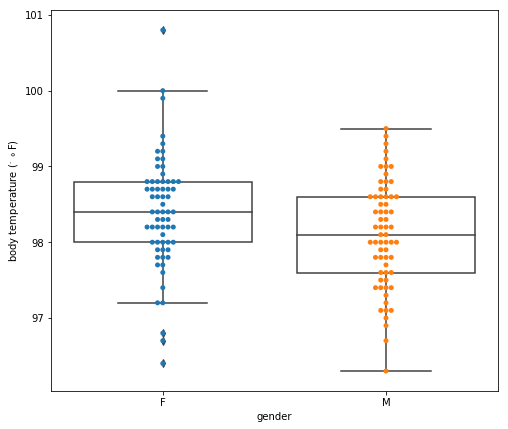

In [33]:
# Lets visualize the body temperature difference based on gender 
plt.figure(figsize = (8,7))
sns.boxplot(x='gender', y='temperature', data=df, boxprops = {'facecolor':'None'})
sns.swarmplot(x = 'gender', y = 'temperature', data = df)

# Label the axes
plt.xlabel('gender')
plt.ylabel('body temperature ($^.\circ$F)')

# Show the plot
plt.show()

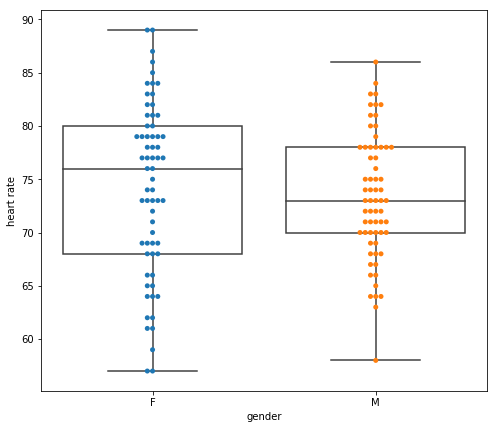

In [34]:
# Lets visualize the heart rate difference based on gender 
plt.figure(figsize = (8,7))
sns.boxplot(x='gender', y='heart_rate', data=df, boxprops = {'facecolor':'None'})
sns.swarmplot(x = 'gender', y = 'heart_rate', data = df)

# Label the axes
plt.xlabel('gender')
plt.ylabel('heart rate')

# Show the plot
plt.show()

## Task-1: Is the distribution of body temperatures normal?

__Normal distributions are characterized as being:__

>a. Symmetrical, 

>b. Bell-shaped, 

>c. 68.27%, 95.45% and 99.73% of the observations falling within one, two and three standard deviations of the mean, respectively.

/Users/amy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


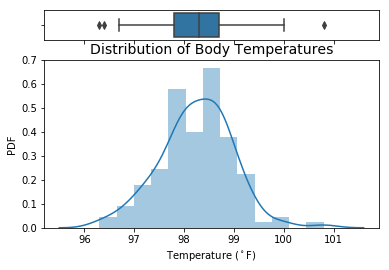

In [40]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})


# Add boxplot for temperature:
sns.boxplot(df.temperature, ax = boxplot)

# Add histogram for temperature:
sns.distplot(df.temperature, ax = None)

# Label axes and add title:
plt.xlabel('Temperature ($^\circ$F)', fontsize=10)
plt.ylabel('PDF')
plt.title('Distribution of Body Temperatures', fontsize=14)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel = " ")

# Display the plots:
plt.show()

In [41]:
# Define a function to compute the CDF

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

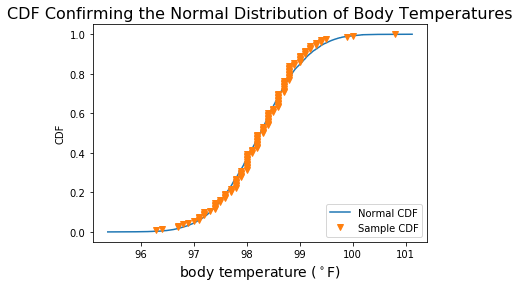

In [42]:
# Mean and standard deviation of our sample
mean = np.mean(df.temperature)
std = np.std(df.temperature)


# Simulate a random sample with the same statistics and size of 10000
normal_samples = np.random.normal(mean, std, size=10000)

# Compute CDFs
x_sample, y_sample = ecdf(df.temperature)
x_normal , y_normal = ecdf(normal_samples) 


# Plot both CDFs on the same plot
plt.plot(x_normal, y_normal)
plt.plot(x_sample, y_sample, marker='v', linestyle='none')

# Label axes and and add legend/title

plt.xlabel('body temperature ($^\circ$F)', fontsize = 14)
plt.ylabel('CDF')
plt.legend(('Normal CDF', 'Sample CDF'), loc = 'lower right')
plt.title('CDF Confirming the Normal Distribution of Body Temperatures', fontsize=16)


# Save and display the plots
plt.savefig('cdf_body_temps.png')
plt.show()

#plt.rcParams['axes.facecolor'] = 'false'

The yellow dots represent the ECDF of body temperatures from the sample data. The black continuous line shows the ECDF of a presumed normal distribution  We can easily see that these two lines overlap each other.  So, we can conclude that our sample also resembles normal distribution. 

For the sake of thoroughness, let us also check to see if the sample set confirms to the 68.27%, 95.45% and 99.73% rule. 

In [43]:
# Sample mean and standard deviation
print("The mean of human temperature data set: {}".format(mean))
print("The standard deviation in human temperature data set: {}".format(std))

The mean of human temperature data set: 98.24923076923078
The standard deviation in human temperature data set: 0.7303577789050377


In [45]:
np_sample = df.temperature.values
num_obs = len(np_sample[(np_sample > mean-3*std) & (np_sample < mean+3*std)])
print('Number  of observations within three standard deviations of the mean: {}'.format(num_obs))
print("Total number of observations is {}".format(len(df)))
prop_obs = float(num_obs) / len(np_sample)
print('Proportion of observations within three standard deviations of the mean: {}'.format(prop_obs))

Number  of observations within three standard deviations of the mean: 129
Total number of observations is 130
Proportion of observations within three standard deviations of the mean: 0.9923076923076923


In [46]:
np_sample = df.temperature.values
num_obs = len(np_sample[(np_sample > mean-2*std) & (np_sample < mean+2*std)])
print('Number  of observations within three standard deviations of the mean: {}'.format(num_obs))
print("Total number of observations is {}".format(len(df)))
prop_obs = float(num_obs) / len(np_sample)
print('Proportion of observations within three standard deviations of the mean: {}'.format(prop_obs))

Number  of observations within three standard deviations of the mean: 123
Total number of observations is 130
Proportion of observations within three standard deviations of the mean: 0.9461538461538461


In [47]:
np_sample = df.temperature.values
num_obs = len(np_sample[(np_sample > mean-1*std) & (np_sample < mean+1*std)])
print('Number  of observations within three standard deviations of the mean: {}'.format(num_obs))
print("Total number of observations is {}".format(len(df)))
prop_obs = float(num_obs) / len(np_sample)
print('Proportion of observations within three standard deviations of the mean: {}'.format(prop_obs))

Number  of observations within three standard deviations of the mean: 90
Total number of observations is 130
Proportion of observations within three standard deviations of the mean: 0.6923076923076923


#### The shortest way for this question.

In [99]:
k2, p = stats.normaltest(df.temperature)
print("p = {}".format(p))

p = 0.2587479863488254


In [100]:
alpha = 0.05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Distribution of Body Temperature iS NOT Normal")
else:
    print("Distribution of Body Temperature is Normal")

Distribution of Body Temperature is Normal


### Conclusion: 

The distribution of the observations is roughly symmetrical, bell-shaped, and the CDF of the sample data is closely aligned with a CDF of a sample set that is modeled as a normal distribution. Besides all, the sample set conforms to the characteristic that 68% of observations are within 1 standard deviation, 95% of observations are within 2 standard deviations and 99% of observations are within 3 standard deviations. Based on all these observations, we can say that distribution of body temperature is normal.  

## Task-2: Is the sample size large? Are the observations independent?

### a. Is 130 people adequate for a sample size?

#### i. first approach:

According to central limit theorem, our sample should be at least 30. As our sample is 130, our sample data set is adequate. 

####  ii. second approach

Since we don't have the population ready, we can redirect our approach into confidence levels and margin of error.
For example, it's desirable to have a 95% confidence rate ± 5% as a margin of error.
For this to work we would need a minimum sample size to be 95 ± 5% confident.

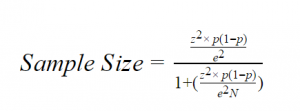

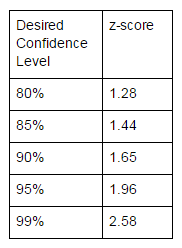

In [50]:
from IPython.display import display, Image
display(Image(filename='Sample_size.png'))
display(Image(filename='Z_score.png'))

In [51]:
def nec_samp_size(popsize, marginoferror, zscore):
    stdev = 0.50
    x = (zscore**2) * (stdev) * (1-stdev)
    y = marginoferror**2
    z = y*popsize
    a = x / y
    b = x / z
    nec_samp_size = a / (1 + b)
    print("Necessary sample size: ", '%.0f' % nec_samp_size)

In [52]:
nec_samp_size(1000000, 0.05, 1.96)

Necessary sample size:  384


In [53]:
print("Actual sample size:", len(df))

Actual sample size: 130


So assuming that our population is at least 1 million people, we would need at least 384 respondants to be 95 ± 5% confident.
However, we only have 180 respondants. Thus, our sample size is too small for our desired parameters.
Let's change our standards to 90 ± 10% confident.

In [54]:
nec_samp_size(1000000, 0.10, 1.65)

Necessary sample size:  68


Since the necessary sample size for 90 ± 10% confidence is at least 68 respondance for 1 million people, we can say that our sample size is adequate!

### b. Are the observations independent?

**Conclusion:**
Two observations are independent if the occurrence of one observation is free from the occurrence of another observation. And this is the case for our sample. They are independent.

Although what we do now has nothing to do with the dependency of observations, let's look at the correlation of these two variables

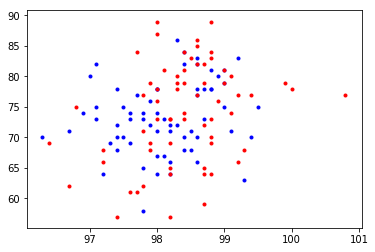

In [55]:
plt.scatter(df.temperature[df.gender =='M'], df.heart_rate[df.gender == 'M'], color = 'blue', marker = '.', norm = True)
plt.scatter(df.temperature[df.gender =='F'], df.heart_rate[df.gender == 'F'], color = 'red', marker = '.', norm = True)


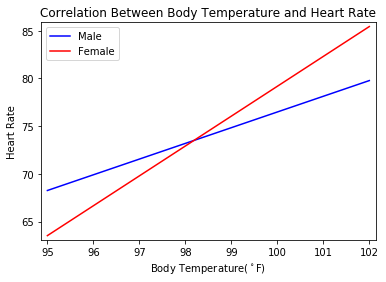

In [96]:
xm, ym = np.polyfit(df[df.gender=='M']['temperature'], df[df.gender=='M']['heart_rate'], 1)
xf, yf = np.polyfit(df[df.gender=='F']['temperature'], df[df.gender=='F']['heart_rate'], 1)

# Make theoretical line to plot
x = np.array([95,102])
y_m = xm * x + ym
y_f = xf * x + yf

# Add regression line to your plot
plt.plot(x, y_m, color='blue')
plt.plot(x, y_f, color='red')
plt.legend(('Male','Female'))
plt.xlabel("Body Temperature($^\circ$F)")
plt.ylabel("Heart Rate")
plt.title('Correlation Between Body Temperature and Heart Rate')
plt.margins(0.02)

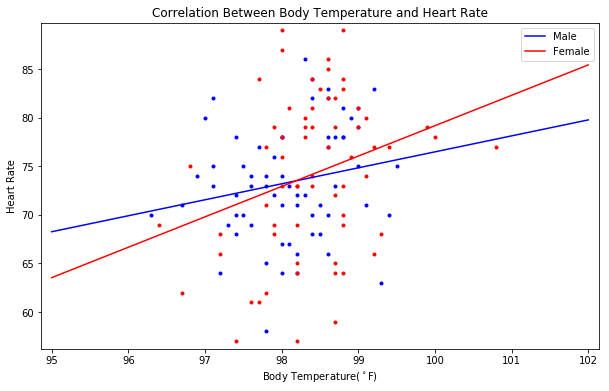

In [57]:
# Make a scatter plot
plt.figure(figsize = (10,6))
plt.scatter(df.temperature[df.gender =='M'], df.heart_rate[df.gender == 'M'], color = 'blue', marker = '.', norm = True)
plt.scatter(df.temperature[df.gender =='F'], df.heart_rate[df.gender == 'F'], color = 'red', marker = '.', norm = True)

# Create the data set for our regression lines (line of best fit)
xm, ym = np.polyfit(df[df.gender=='M']['temperature'], df[df.gender=='M']['heart_rate'], 1)
xf, yf = np.polyfit(df[df.gender=='F']['temperature'], df[df.gender=='F']['heart_rate'], 1)

# Create the equtions of lines to plot
x = np.array([95,102])
y_m = xm * x + ym
y_f = xf * x + yf

# Add regression lines to your plot
plt.plot(x, y_m, color='blue')
plt.plot(x, y_f, color='red')
plt.legend(('Male','Female'))
plt.xlabel("Body Temperature($^\circ$F)")
plt.ylabel("Heart Rate")
plt.title('Correlation Between Body Temperature and Heart Rate')
plt.margins(0.02)

There is a possitive correlation between body temperature and health rate. Let's look at pearson correlation values of those observations.

So, let's look at their Pearson's Correlation Coefficient:

In [58]:
corr_mat = np.corrcoef(df['temperature'],df['heart_rate'])
print(corr_mat[0,1])

0.2536564027207642


Pearson correlation values are very low. It may be interpreted as a very weak positive correlation between heart rate and body temperature.

## Task-3: Is the true population mean really 98.6 degrees F?
    
    First, try a bootstrap hypothesis test.
    Secondly, try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the  t or  z statistic?
    Now try using the other test. How is the result be different? Why?

### a. bootstrap hypothesis test

our hypothesis for this testing:

(The null hypothesis) Ho: The population mean temperature = 98.6 F (Ho: μ1 = μ)

(The alternative hypothesis) Ha: The population mean temperature ≠ 98.6 F (H1: μ1 ≠ μ)

In [72]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [73]:
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(df['temperature'], np.mean)

/Users/amy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


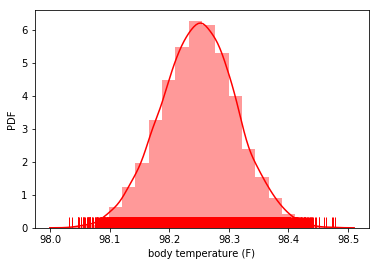

In [74]:
sns.distplot(bs_replicates, rug='True', bins=20, color = 'red')
plt.xlabel('body temperature (F)')
plt.ylabel('PDF')
plt.show()

In [75]:
# Compute the confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print ('95% confidence interval =',conf_int)

95% confidence interval = [98.12230769 98.37692308]


In [76]:
# Compute the p-value

p_value = np.sum(bs_replicates >=98.6) / 10000
print ('p-value = ', p_value)

p-value =  0.0


**Conclusion for the bootstrap hypothesis test:**

Since p-value is less than 0.05, we reject the null hypothesis, which states that population mean and the sample means are equal. Our conclusion is that the population mean differs from 98.6 F. Based on the 95% confidence interval, temperatures between 98.12 and 98.37 are considered normal.

### b. Try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

For this test, we will use a one-sample test since we are only given one sample mean. The confidence level is 95%:
    
    (The null hypothesis) Ho: The population mean temperature = 98.6 F   (Ho: μ1 = μ)

    (The alternative hypothesis) Ha: The population mean temperature ≠ 98.6 F  (H1: μ1 ≠ μ)

**i. t-test:**

In [64]:
# Use one-sample test with the null hypothesis that true population mean is 98.6
# Since we do not know the population standard deviation, we will use t-statistic. 

t, p = stats.ttest_1samp(df.temperature, 98.6)
print('t-statistic:', t)
print('p-value:', p)

t-statistic: -5.4548232923645195
p-value: 2.4106320415561276e-07


**Conclusion:**
Our p-value is less than 0.05, so we reject Ho. 

**ii. z-test:** 

In [68]:
# Calculate standard error of the mean:
sem = std/np.sqrt(130)

# Calculate and save z-statistic:
z = (mean - 98.6) / sem

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -5.475925202078116
p-value: 4.3523151658821886e-08


**Conclusion:**
Our p-value is less than 0.05, so we reject Ho.

### c. In this situation, is it appropriate to use the t or z statistics?

It seems that both tets gave the same result. So either of them can be used for it.

### d. Try using the other test. How is the result be different? Why? 

Actually, this question's answer was given above. I tried t and z test. In every test the p-value is significantly less than significance level (0.05), so the null hypothesis is rejected. It means that population mean is different from sample mean.

## Task-4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

    Which one is the correct one to use?
    What do you notice? What does this tell you about the difference in application of the  t and  z statistic?

### a. Which one is the correct one to use?

This test meets the criteria for a t-test: the population standard deviation is unkown and the sample size is small.

In [88]:
## Bootstrap method

# Randomly select a size 10 array: 
temp_array_sub = np.random.choice(bs_replicates, size=10, replace=True)

cc_replicates = np.empty(10000)
for i in range(10000):
    cc_replicates[i] = bootstrap_replicate_1d(temp_array_sub, np.mean)


# Compute fraction of replicates that are less than sampled body temperatures: p
p = np.sum(cc_replicates >= np.mean(temp_array_sub)) / float(10000)

# Print the p-value
print ('p-value: {}'.format(p))

p-value: 0.5133


In [87]:
## t-test
sample_mean = np.mean(temp_array_sub)
t, p = stats.ttest_1samp(cc_replicates, sample_mean)
print('t-statistic:', t)
print('p-value:', p)

t-statistic: -0.850103680423865
p-value: 0.3952878001915794


In [91]:
## z-test
sample_mean = np.mean(temp_array_sub) 
sample_std  = np.std(temp_array_sub)

# Calculate standard error of the mean:
sem = sample_std /np.sqrt(10)

# Calculate and save z-statistic:
z = (sample_mean - 98.6) / sem

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -28.89599495617253
p-value: 1.3406054472636544e-183


#### Conclusion: 

As p value are too low.

## Task-5: At what temperature should we consider someone's temperature to be "abnormal"?

    As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist  approach.
    Start by computing the margin of error and confidence interval. 
    When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

We will get a 95% confidence interval according to the normal distribution to find out abnormals.

### a.Bootstrap Approach

In [102]:
# Compute the confidence interval
conf_int = np.percentile(bs_replicates,[2.5, 97.5])

# Print the confidence interval
print('95 % confidence interval = {}'.format(conf_int))

95 % confidence interval = [98.12230769 98.37692308]


**Conclusion:**

We would consider someone's body temperature lower than 98.12 or higher than 98.38 to be considered abnormal.

### b.Frequentist Approach¶

In [108]:

x = df.temperature
n = len(x)

SE = stats.sem(x, ddof = 1) # ddof = 1 is default -- Delta Degrees of Freedom
#SE = (x.std()/np.sqrt(len(x)))

# t-critical at 95% confidence Level with 129 degrees of freedom
t_c = stats.t.ppf(0.975, df=n-1) 

# Margin of Error
moe = t_c * SE

# Confidence Interval
Confidence_int = x.mean() - moe , x.mean() + moe
Confidence_int

(98.12200290560804, 98.37645863285351)

**Conclusion:**

We would consider someone's body temperature abnormal if it is out of interval stated above.